# importing all the libraries

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
import sklearn

# importing dataset

In [12]:
data=pd.read_csv('matches1234.csv')


# analyzing the first 5 rows of the dataset

In [11]:
data.head()

,season,city,team1,team2,toss_winner,toss_decision,winner,win_by_runs,win_by_wickets,venue,umpire1
0,2017,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,35,0,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar
1,2017,Pune,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,Rising Pune Supergiants,0,7,Maharashtra Cricket Association Stadium,A Nand Kishore
2,2017,Rajkot,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,0,10,Saurashtra Cricket Association Stadium,Nitin Menon
3,2017,Indore,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,0,6,Holkar Cricket Stadium,AK Chaudhary
4,2017,Bangalore,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,Royal Challengers Bangalore,15,0,M Chinnaswamy Stadium,NaN


# brief summary of the IPL dataset

In [13]:
data.describe()

,season,win_by_runs,win_by_wickets
count,636.000000,636.000000,636.000000
mean,2012.490566,13.682390,3.372642
std,2.773026,23.908877,3.420338
min,2008.000000,0.000000,0.000000
25%,2010.000000,0.000000,0.000000
50%,2012.000000,0.000000,4.000000
75%,2015.000000,20.000000,7.000000
max,2017.000000,146.000000,10.000000


# checking null values present in the dataset

In [15]:
data.dropna(inplace=True)
data.isnull().sum()


season            0
city              0
team1             0
team2             0
toss_winner       0
toss_decision     0
winner            0
win_by_runs       0
win_by_wickets    0
venue             0
umpire1           0
dtype: int64

In [16]:
data["team1"].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Kolkata Knight Riders',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kings XI Punjab', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors'],
      dtype=object)

# changing old name of teams

In [17]:
data['team1']=data['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
data['team2']=data['team2'].str.replace('Delhi Daredevils','Delhi Capitals')
data['winner']=data['winner'].str.replace('Delhi Daredevils','Delhi Capitals')

In [18]:
data['team1']=data['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
data['team2']=data['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
data['winner']=data['winner'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

# visualizations

Text(0.5, 1.0, 'Number of  IPL  matches won by each team')

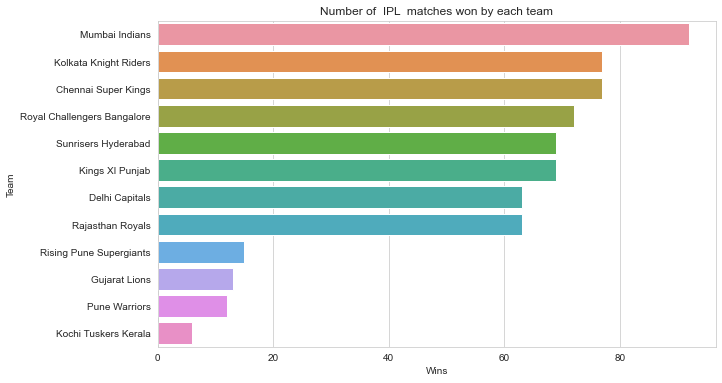

In [19]:
plt.figure(figsize = (10,6))
sns.countplot(y = 'winner',data = data,order= data['winner'].value_counts().index)
plt.xlabel('Wins')
plt.ylabel('Team')
plt.title('Number of  IPL  matches won by each team')


Text(0.5, 1.0, 'Total Number of matches played in different stadium')

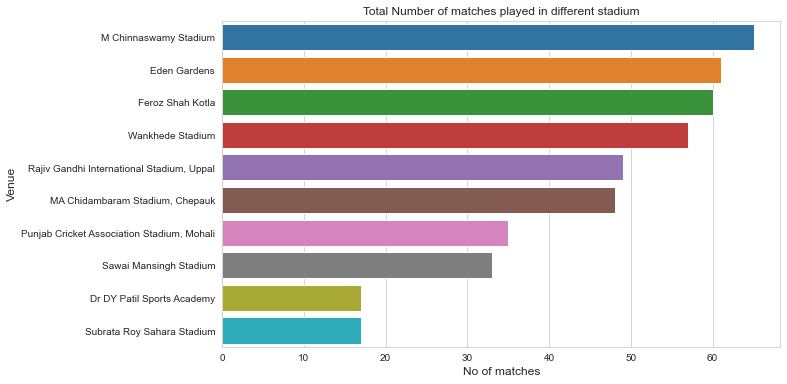

In [20]:
plt.figure(figsize = (10,6))
sns.countplot(y = 'venue',data = data,order = data['venue'].value_counts().iloc[:10].index)
plt.xlabel('No of matches',fontsize=12)
plt.ylabel('Venue',fontsize=12)
plt.title('Total Number of matches played in different stadium')

Text(0.5, 1.0, 'Toss Decision')

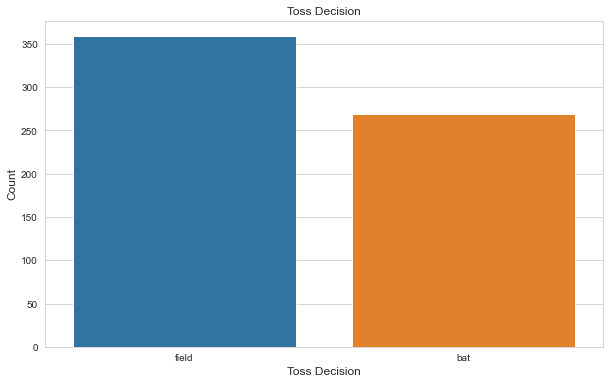

In [21]:
plt.figure(figsize = (10,6))
sns.countplot(x = "toss_decision", data=data)
plt.xlabel('Toss Decision',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Toss Decision')

# dropping needless features

In [25]:
data.drop([ "season","city", 'umpire1', "venue"], axis=1, inplace=True)

# converting data into dependent and independent variable

In [26]:
X = data.drop(["winner"], axis=1)
y = data["winner"]

# converting categorical values into numerical values

In [28]:
X = pd.get_dummies(X, ["team1","team2", "toss_winner", "toss_decision"], drop_first = True)

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# split data into test and train set

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

# model creation and evaluation

In [31]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200,min_samples_split=3,
                               max_features = "auto")

In [32]:
model.fit(x_train, y_train)

RandomForestClassifier(min_samples_split=3, n_estimators=200)

In [33]:
y_pred = model.predict(x_test)

In [34]:
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_pred, y_test)

In [35]:
ac

0.8809523809523809